In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import torch
import torch.nn as nn
import sys
import pathlib
import pickle
from pathlib import Path
sys.path.append(f"{Path.home()}/morpho_repo")
sys.path.append(f"{Path.home()}/morpho_repo/pytorch")
from pinns import *
from local_utils import *

from pinns import *
from intro import *

In [2]:
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
#device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")
dev_str = f"{device.type}:{device.index}"

In [3]:
import pickle
with open(f"./inputs/solution_14.pkl", "rb") as f:
    (run_params, params, solution) = pickle.load(f)
    
    
run_params = Struct(**run_params)
params = Struct(**params)

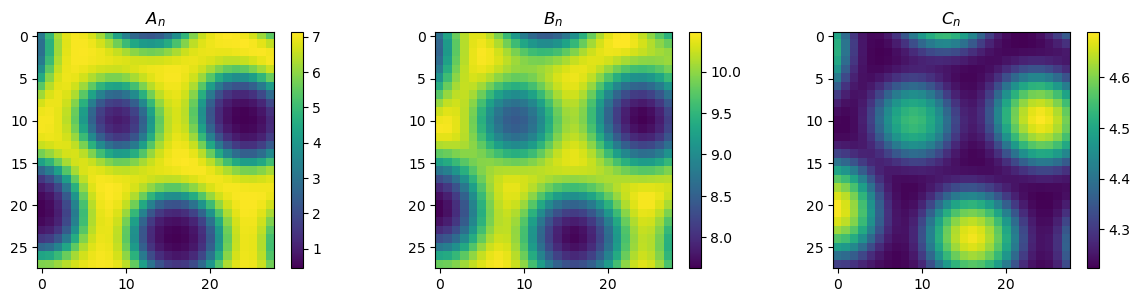

In [4]:
A_n = solution[-1, 0, :, :]
B_n = solution[-1, 1, :, :]
C_n = solution[-1, 2, :, :]

#############################################################
#    Inner boundaries
# By using these slices, we can remove the boundary effects
# or select a smaller portion of the domain
#
#   Important: slices must not be larger than slices(1,-1,1).
#              Otherwise, the boundary effects of finit difference
#              Laplacian cannot be removed
#
x_slice = slice(50,-50, 1)
y_slice = slice(50,-50, 1)

to = create_to(A_n[x_slice,y_slice])
########################################
# Take the average of data points
kernel =np.array([[1, 1],
                  [1, 1]])


A_n = ndimage.convolve(A_n, kernel)/4
B_n = ndimage.convolve(B_n, kernel)/4
C_n = ndimage.convolve(C_n, kernel)/4
############################################################
plot_n_im([A_n[x_slice,y_slice], 
           B_n[x_slice,y_slice], 
           C_n[x_slice,y_slice]], 
          [r"$A_{n}$", r"$B_{n}$", r"$C_{n}$"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()

In [5]:
A_min, A_max = np.min(A_n), np.max(A_n)
B_min, B_max = np.min(B_n), np.max(B_n)
C_min, C_max = np.min(C_n), np.max(C_n)
n = params["n"]
tol = .005

def define_bound(tol, n, x_min, x_max):
    upper = ((1-tol)/tol)**(1/n)
    lower = (tol/(1-tol))**(1/n)
    # return (lower, upper) bounds and the initial guess
    return (max(0,x_min*lower), x_max*upper), max(0, (x_max*upper-max(0,x_min*lower))/2)
    
K_AA_bound, K_AA_init =  define_bound(tol, n, A_min, A_max)
K_AB_bound, K_AB_init =  define_bound(tol, n, A_min, A_max)
K_AC_bound, K_AC_init =  define_bound(tol, n, A_min, A_max)
K_BA_bound, K_BA_init =  define_bound(tol, n, B_min, B_max)
K_BC_bound, K_BC_init =  define_bound(tol, n, B_min, B_max)
K_CB_bound, K_CB_init =  define_bound(tol, n, C_min, C_max)
K_CC_bound, K_CC_init =  define_bound(tol, n, C_min, C_max)

Ks_bounds = {"K_AA":K_AA_bound, 
             "K_AB":K_AB_bound, 
             "K_AC":K_AC_bound,
             "K_BA":K_BA_bound, 
             "K_BC":K_BC_bound,
             "K_CB":K_CB_bound, 
             "K_CC": K_CC_bound}
def closest_bound(name, v):
    if not name.startswith("K"):
        return np.nan
    lower, upper = Ks_bounds[name]
    if np.abs(v-lower) < np.abs(v-upper):
        return lower
    else:
        return upper 
def get_bound(name):
    if not name.startswith("K"):
        return (0, None)
    return Ks_bounds[name]


Epoch: 1 
 data loss:19.288281, 
data A loss:5.458422, data B loss:9.412859, data C loss:4.417000, 
Laplacian A loss:86.334300, Laplacian B loss:26.204598
Physics loss:1.882490
Negative loss:0.134072

 b_A=0.9000, b_B=0.9000, b_C=0.9000, V_A=1.0000, V_B=1.0000, V_C=1.0000, mu_A=0.9000, mu_B=1.0999, K_AA=13.8495, K_AB=13.8495, K_AC=13.8495, K_BA=19.3400, K_BC=19.3400, K_CB=8.6193, K_CC=8.6193


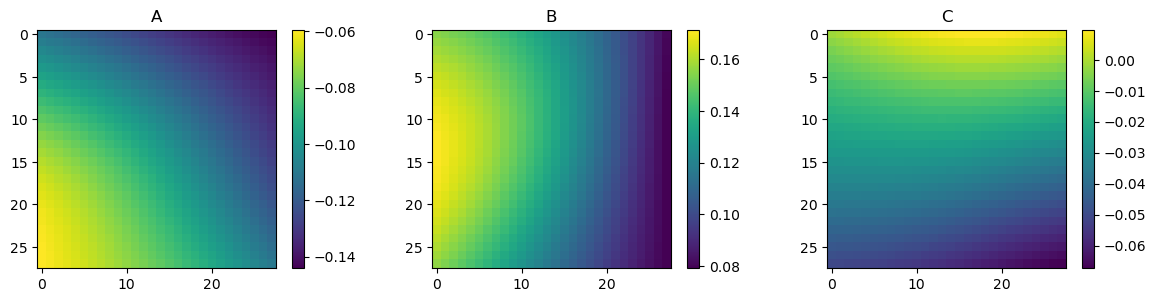

Epoch: 1000 
 data loss:3.728156, 
data A loss:2.663478, data B loss:0.918898, data C loss:0.145780, 
Laplacian A loss:36.926917, Laplacian B loss:25.619988
Physics loss:2.697685
Negative loss:0.431855

 b_A=-0.0985, b_B=21.7527, b_C=10.2461, V_A=2.2005, V_B=25.0848, V_C=12.1401, mu_A=-0.2026, mu_B=2.2479, K_AA=12.2963, K_AB=6.6895, K_AC=27.7510, K_BA=18.4824, K_BC=40.2867, K_CB=3.1114, K_CC=1.9081


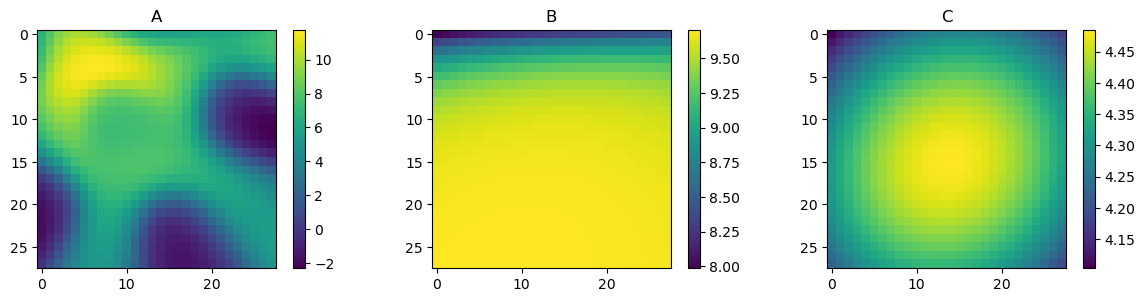

Epoch: 2000 
 data loss:1.390970, 
data A loss:0.325733, data B loss:0.927773, data C loss:0.137463, 
Laplacian A loss:3.042432, Laplacian B loss:24.501761
Physics loss:7.047854
Negative loss:0.010710

 b_A=-0.0205, b_B=54.0359, b_C=10.9374, V_A=8.3580, V_B=52.3139, V_C=15.6105, mu_A=0.9188, mu_B=5.7053, K_AA=4.5398, K_AB=6.4667, K_AC=27.7579, K_BA=35.7447, K_BC=40.5119, K_CB=3.2711, K_CC=3.5253


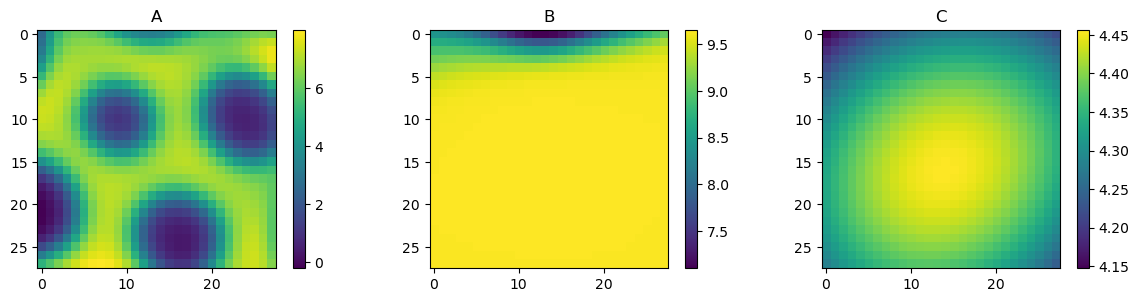

Epoch: 3000 
 data loss:1.094695, 
data A loss:0.162344, data B loss:0.798846, data C loss:0.133505, 
Laplacian A loss:1.375791, Laplacian B loss:22.839094
Physics loss:9.119695
Negative loss:0.000000

 b_A=-0.0151, b_B=20.6724, b_C=11.2470, V_A=8.5451, V_B=116.4189, V_C=17.6954, mu_A=0.9550, mu_B=2.6453, K_AA=4.4808, K_AB=6.2619, K_AC=27.7620, K_BA=36.8233, K_BC=40.5021, K_CB=3.2082, K_CC=3.9403


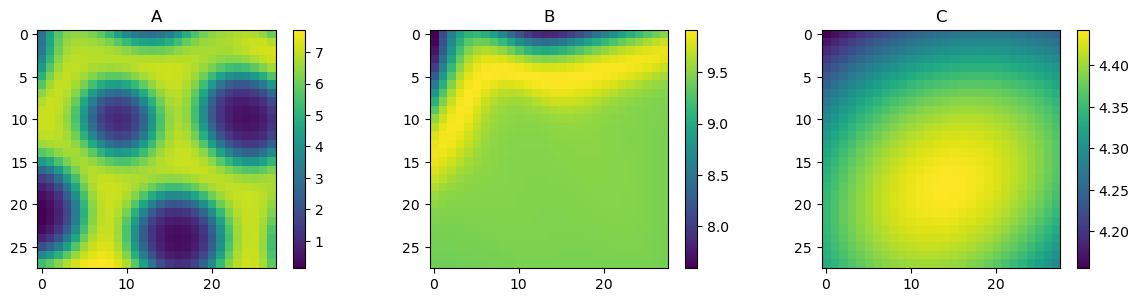

Epoch: 4000 
 data loss:0.420964, 
data A loss:0.109256, data B loss:0.182454, data C loss:0.129254, 
Laplacian A loss:0.923997, Laplacian B loss:1.419044
Physics loss:1.657551
Negative loss:0.000000

 b_A=-0.0254, b_B=-0.0085, b_C=11.3719, V_A=10.1523, V_B=122.4586, V_C=18.8263, mu_A=0.9241, mu_B=4.7568, K_AA=4.6610, K_AB=5.0516, K_AC=27.7804, K_BA=15.2833, K_BC=40.5135, K_CB=6.0018, K_CC=4.1171


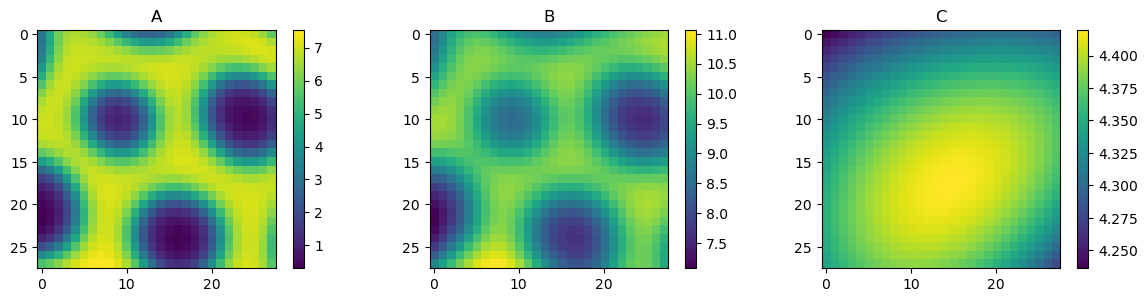

Epoch: 5000 
 data loss:0.320142, 
data A loss:0.079829, data B loss:0.113970, data C loss:0.126343, 
Laplacian A loss:0.708190, Laplacian B loss:0.697736
Physics loss:1.124221
Negative loss:0.000000

 b_A=-0.0373, b_B=-0.0165, b_C=11.4558, V_A=12.2502, V_B=112.0707, V_C=19.5176, mu_A=0.9158, mu_B=4.7879, K_AA=4.8138, K_AB=5.0461, K_AC=27.7884, K_BA=12.5471, K_BC=40.5161, K_CB=6.7842, K_CC=4.2186


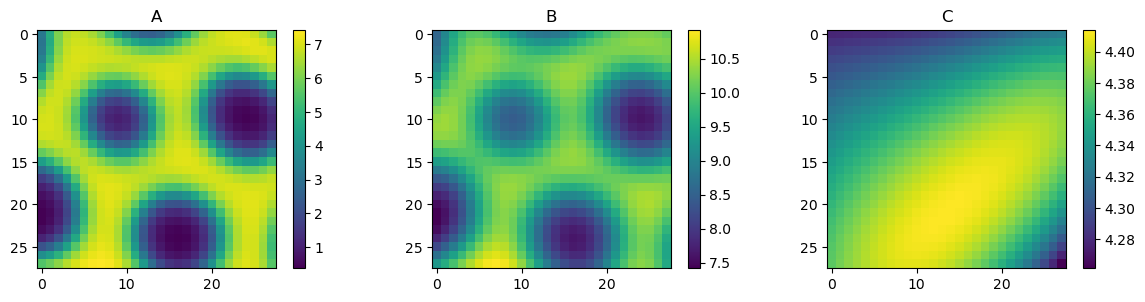

Epoch: 6000 
 data loss:0.246196, 
data A loss:0.060388, data B loss:0.073849, data C loss:0.111959, 
Laplacian A loss:0.545906, Laplacian B loss:0.436081
Physics loss:0.911362
Negative loss:0.000000

 b_A=-0.0311, b_B=-0.0063, b_C=11.5473, V_A=13.9878, V_B=105.4382, V_C=20.3060, mu_A=0.9020, mu_B=4.7840, K_AA=4.9004, K_AB=5.0301, K_AC=27.7836, K_BA=11.4470, K_BC=40.5079, K_CB=7.6734, K_CC=4.3270


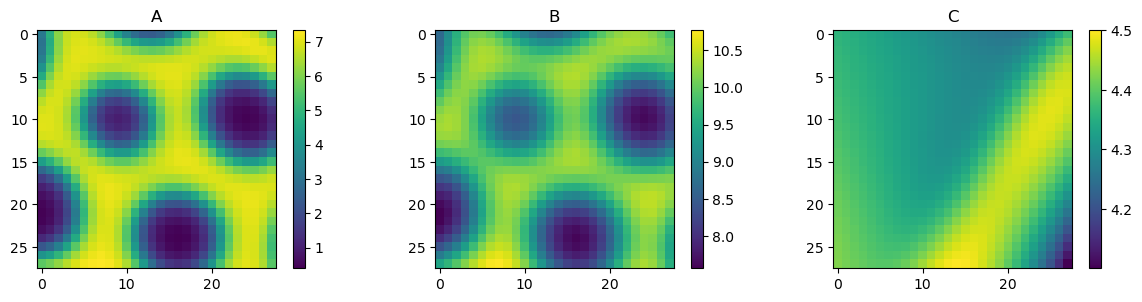

Epoch: 7000 
 data loss:0.178762, 
data A loss:0.048339, data B loss:0.049295, data C loss:0.081128, 
Laplacian A loss:0.454401, Laplacian B loss:0.276127
Physics loss:0.772199
Negative loss:0.000000

 b_A=-0.0338, b_B=-0.0103, b_C=11.6217, V_A=15.4179, V_B=100.5449, V_C=21.1858, mu_A=0.8972, mu_B=4.7836, K_AA=4.9667, K_AB=5.0202, K_AC=27.7776, K_BA=10.8151, K_BC=40.5028, K_CB=8.9409, K_CC=4.4343


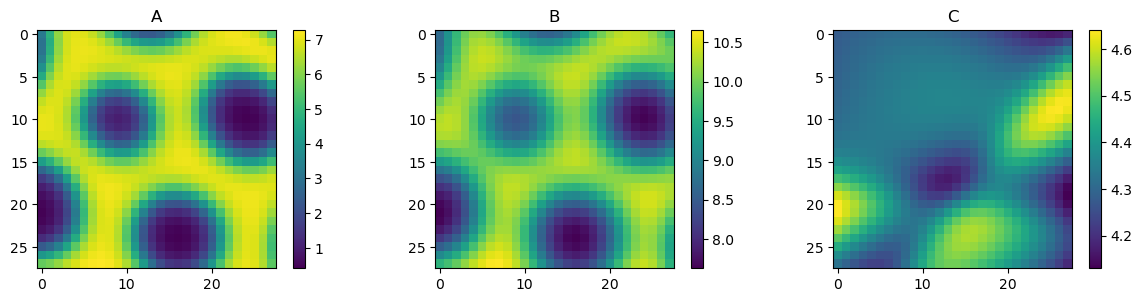

Epoch: 8000 
 data loss:0.144179, 
data A loss:0.041569, data B loss:0.034055, data C loss:0.068555, 
Laplacian A loss:0.386868, Laplacian B loss:0.185173
Physics loss:0.712869
Negative loss:0.000000

 b_A=-0.0320, b_B=-0.0074, b_C=11.7883, V_A=16.4558, V_B=98.6999, V_C=21.3292, mu_A=0.8923, mu_B=4.7794, K_AA=5.0075, K_AB=5.0182, K_AC=27.7850, K_BA=10.4547, K_BC=40.5039, K_CB=9.9180, K_CC=4.4713


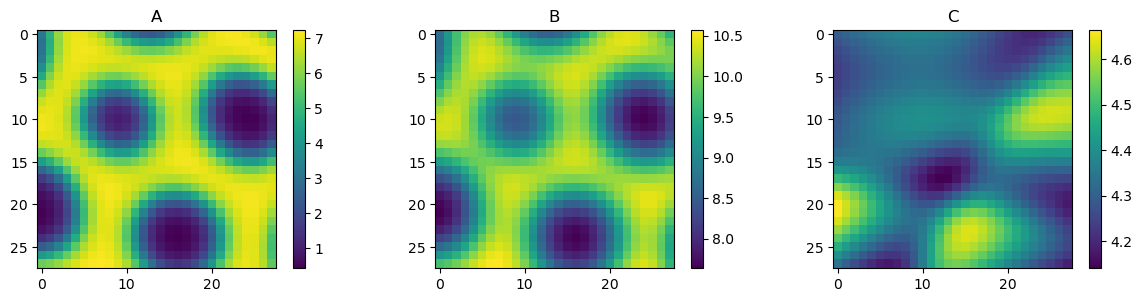

Epoch: 9000 
 data loss:0.094235, 
data A loss:0.037703, data B loss:0.023950, data C loss:0.032581, 
Laplacian A loss:0.327052, Laplacian B loss:0.141863
Physics loss:0.674207
Negative loss:0.000000

 b_A=-0.0377, b_B=-0.0088, b_C=12.0104, V_A=17.1548, V_B=98.1466, V_C=21.4989, mu_A=0.8927, mu_B=4.7794, K_AA=5.0379, K_AB=5.0146, K_AC=27.7705, K_BA=10.2378, K_BC=40.5004, K_CB=10.2410, K_CC=4.5442


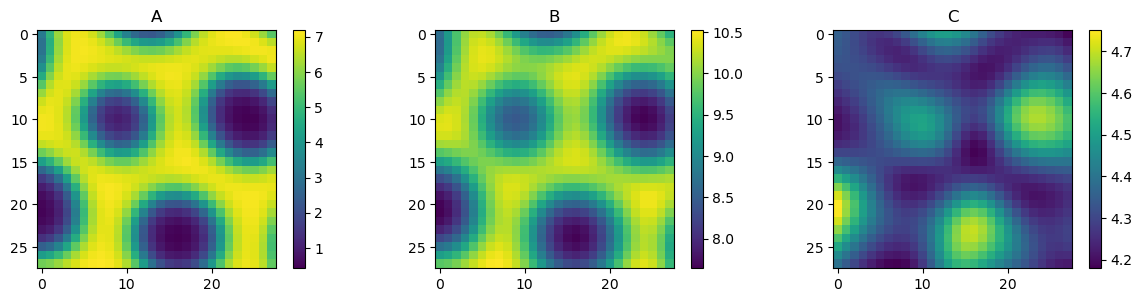

Epoch: 10000 
 data loss:0.073134, 
data A loss:0.035404, data B loss:0.017259, data C loss:0.020470, 
Laplacian A loss:0.285352, Laplacian B loss:0.113095
Physics loss:0.658330
Negative loss:0.000000

 b_A=-0.0351, b_B=-0.0073, b_C=12.2882, V_A=17.6032, V_B=98.2749, V_C=21.6388, mu_A=0.8885, mu_B=4.7795, K_AA=5.0531, K_AB=5.0116, K_AC=27.7629, K_BA=10.1150, K_BC=40.4942, K_CB=10.0840, K_CC=4.6262


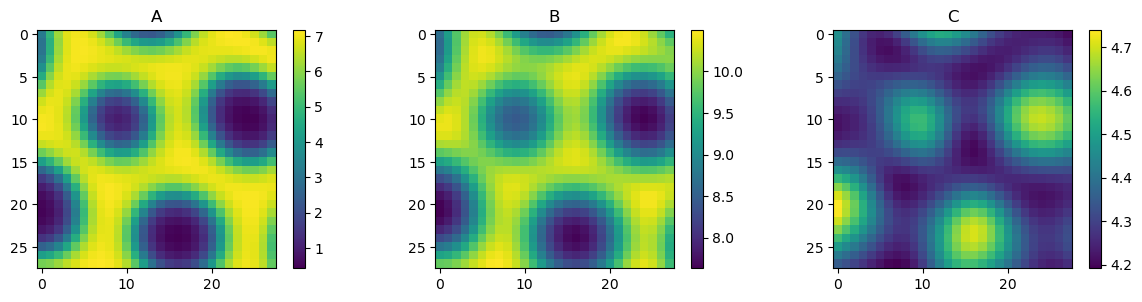

Epoch: 11000 
 data loss:0.063640, 
data A loss:0.034040, data B loss:0.013699, data C loss:0.015901, 
Laplacian A loss:0.253950, Laplacian B loss:0.096458
Physics loss:0.651795
Negative loss:0.000000

 b_A=-0.0313, b_B=-0.0065, b_C=12.5539, V_A=17.8747, V_B=98.8515, V_C=21.8077, mu_A=0.8862, mu_B=4.7793, K_AA=5.0614, K_AB=5.0072, K_AC=27.7633, K_BA=10.0459, K_BC=40.4961, K_CB=9.6096, K_CC=4.6965


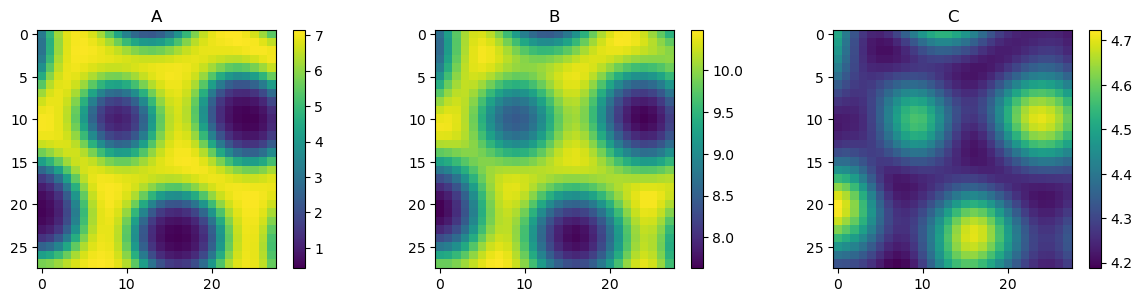

Epoch: 12000 
 data loss:0.058836, 
data A loss:0.033042, data B loss:0.011915, data C loss:0.013880, 
Laplacian A loss:0.232168, Laplacian B loss:0.088313
Physics loss:0.650333
Negative loss:0.000000

 b_A=-0.0293, b_B=-0.0040, b_C=12.7913, V_A=18.0317, V_B=99.6511, V_C=22.0057, mu_A=0.8848, mu_B=4.7788, K_AA=5.0665, K_AB=5.0015, K_AC=27.7623, K_BA=10.0067, K_BC=40.4964, K_CB=9.1083, K_CC=4.7673


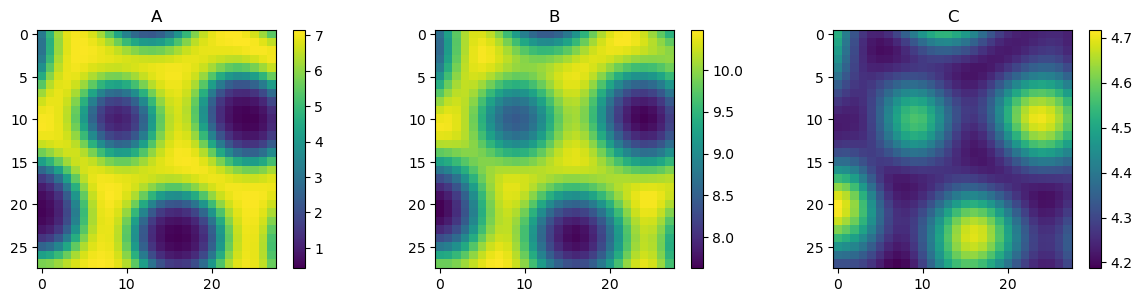

Epoch: 13000 
 data loss:0.055905, 
data A loss:0.032395, data B loss:0.010918, data C loss:0.012592, 
Laplacian A loss:0.209224, Laplacian B loss:0.082003
Physics loss:0.640097
Negative loss:0.000000

 b_A=-0.0297, b_B=-0.0052, b_C=12.9966, V_A=18.1232, V_B=100.4869, V_C=22.2174, mu_A=0.8845, mu_B=4.7800, K_AA=5.0702, K_AB=4.9979, K_AC=27.7604, K_BA=9.9836, K_BC=40.4956, K_CB=8.7022, K_CC=4.8338


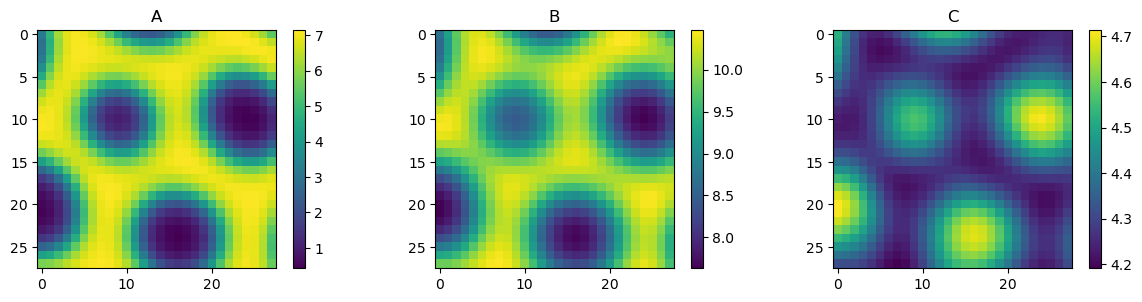

Epoch: 14000 
 data loss:0.054059, 
data A loss:0.031836, data B loss:0.010446, data C loss:0.011778, 
Laplacian A loss:0.206193, Laplacian B loss:0.078963
Physics loss:0.639751
Negative loss:0.000000

 b_A=-0.0307, b_B=-0.0035, b_C=13.1660, V_A=18.1702, V_B=101.2971, V_C=22.4337, mu_A=0.8839, mu_B=4.7793, K_AA=5.0731, K_AB=4.9923, K_AC=27.7560, K_BA=9.9705, K_BC=40.4918, K_CB=8.3768, K_CC=4.8973


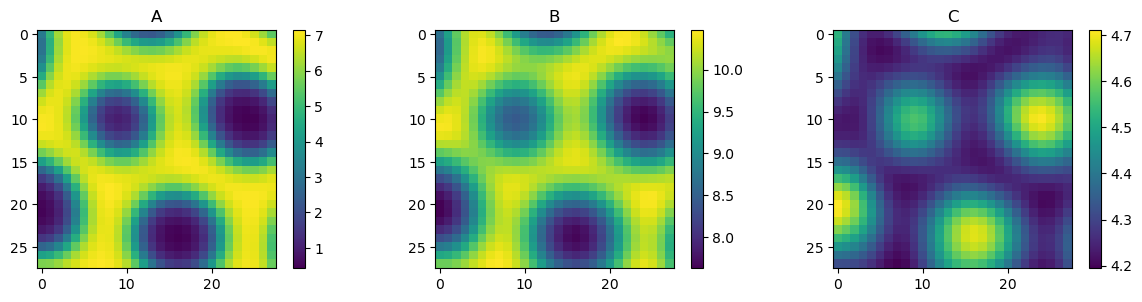

Epoch: 15000 
 data loss:0.053081, 
data A loss:0.031538, data B loss:0.010077, data C loss:0.011466, 
Laplacian A loss:0.179180, Laplacian B loss:0.074780
Physics loss:0.632798
Negative loss:0.000000

 b_A=-0.0289, b_B=-0.0044, b_C=13.3162, V_A=18.2156, V_B=102.1506, V_C=22.6517, mu_A=0.8832, mu_B=4.7807, K_AA=5.0731, K_AB=4.9895, K_AC=27.7627, K_BA=9.9619, K_BC=40.4969, K_CB=8.1011, K_CC=4.9402


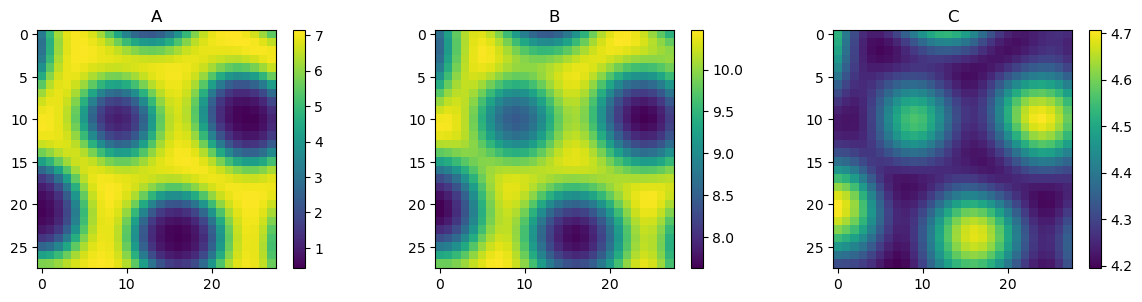

Epoch: 16000 
 data loss:0.051356, 
data A loss:0.031153, data B loss:0.009723, data C loss:0.010480, 
Laplacian A loss:0.165671, Laplacian B loss:0.070464
Physics loss:0.627875
Negative loss:0.000000

 b_A=-0.0299, b_B=-0.0050, b_C=13.4387, V_A=18.2326, V_B=102.9353, V_C=22.8593, mu_A=0.8840, mu_B=4.7814, K_AA=5.0745, K_AB=4.9861, K_AC=27.7578, K_BA=9.9574, K_BC=40.4952, K_CB=7.8784, K_CC=4.9939


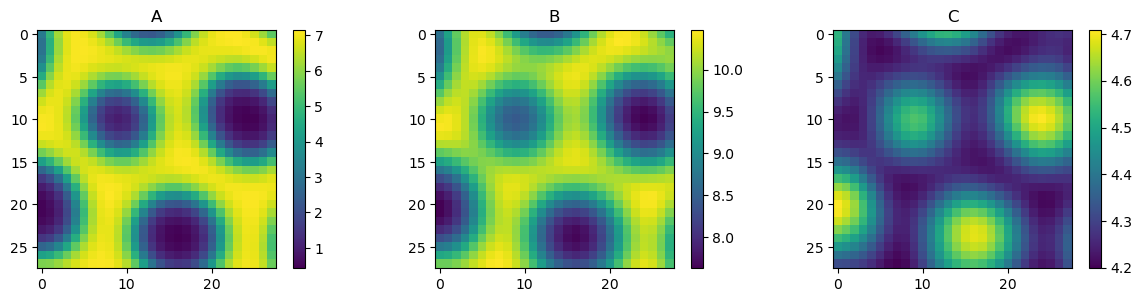

Epoch: 17000 
 data loss:0.050531, 
data A loss:0.030869, data B loss:0.009536, data C loss:0.010126, 
Laplacian A loss:0.155659, Laplacian B loss:0.068053
Physics loss:0.627397
Negative loss:0.000000

 b_A=-0.0300, b_B=-0.0033, b_C=13.5422, V_A=18.2475, V_B=103.6881, V_C=23.0595, mu_A=0.8834, mu_B=4.7809, K_AA=5.0746, K_AB=4.9816, K_AC=27.7585, K_BA=9.9544, K_BC=40.4959, K_CB=7.6921, K_CC=5.0339


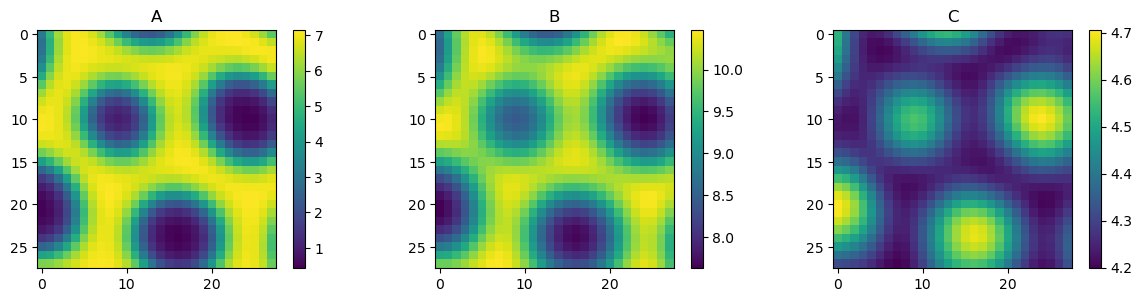

Epoch: 18000 
 data loss:0.049503, 
data A loss:0.030665, data B loss:0.009294, data C loss:0.009545, 
Laplacian A loss:0.146535, Laplacian B loss:0.065150
Physics loss:0.620752
Negative loss:0.000000

 b_A=-0.0297, b_B=-0.0044, b_C=13.6370, V_A=18.2413, V_B=104.3614, V_C=23.2554, mu_A=0.8839, mu_B=4.7819, K_AA=5.0752, K_AB=4.9792, K_AC=27.7563, K_BA=9.9555, K_BC=40.4946, K_CB=7.5411, K_CC=5.0757


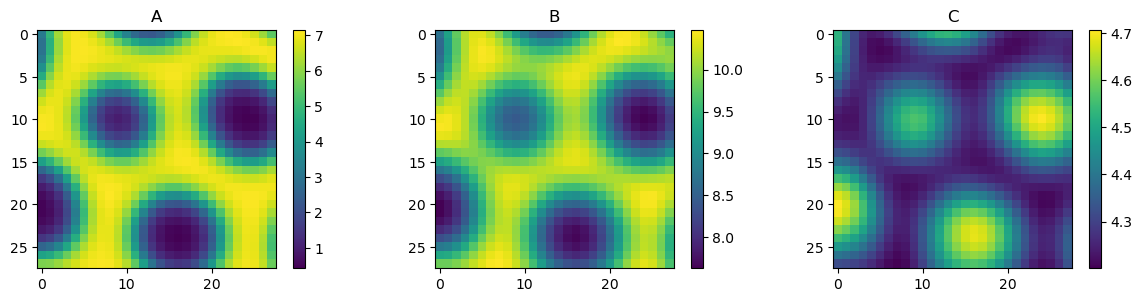

Epoch: 19000 
 data loss:0.048779, 
data A loss:0.030489, data B loss:0.009168, data C loss:0.009122, 
Laplacian A loss:0.141625, Laplacian B loss:0.063725
Physics loss:0.617576
Negative loss:0.000000

 b_A=-0.0309, b_B=-0.0051, b_C=13.7154, V_A=18.2369, V_B=105.0215, V_C=23.4419, mu_A=0.8844, mu_B=4.7831, K_AA=5.0767, K_AB=4.9764, K_AC=27.7579, K_BA=9.9535, K_BC=40.4951, K_CB=7.4024, K_CC=5.1083


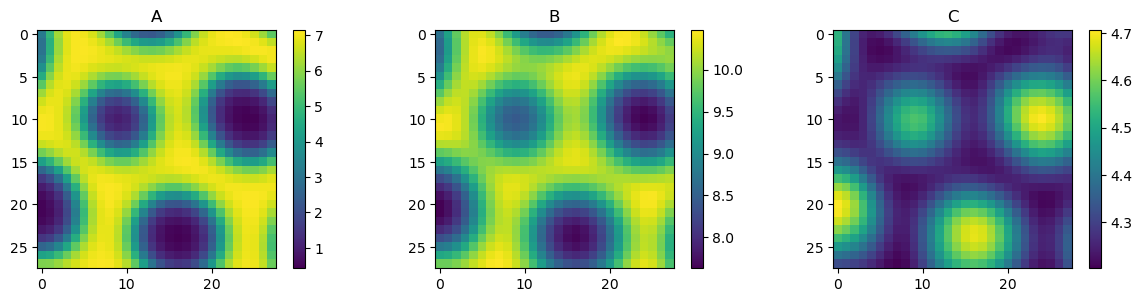

Epoch: 20000 
 data loss:0.048086, 
data A loss:0.030286, data B loss:0.009053, data C loss:0.008747, 
Laplacian A loss:0.133371, Laplacian B loss:0.061597
Physics loss:0.619082
Negative loss:0.000000

 b_A=-0.0295, b_B=-0.0033, b_C=13.7867, V_A=18.2438, V_B=105.6821, V_C=23.6109, mu_A=0.8837, mu_B=4.7821, K_AA=5.0752, K_AB=4.9726, K_AC=27.7575, K_BA=9.9552, K_BC=40.4957, K_CB=7.2841, K_CC=5.1389


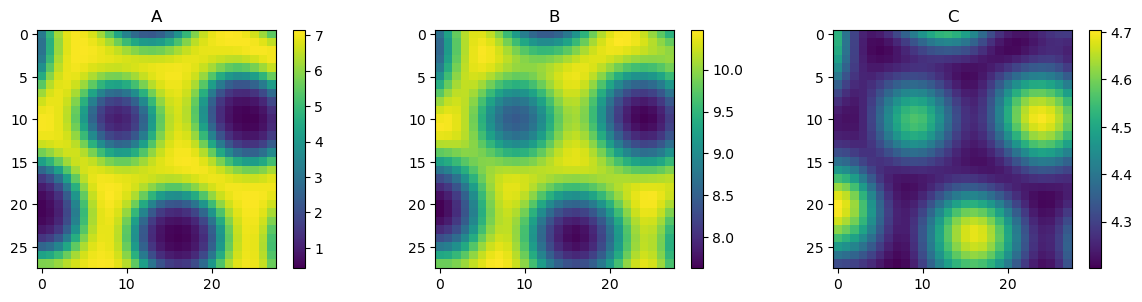

Epoch: 21000 
 data loss:0.047379, 
data A loss:0.030178, data B loss:0.008905, data C loss:0.008296, 
Laplacian A loss:0.125610, Laplacian B loss:0.059620
Physics loss:0.613530
Negative loss:0.000000

 b_A=-0.0310, b_B=-0.0044, b_C=13.8505, V_A=18.2420, V_B=106.2976, V_C=23.7758, mu_A=0.8845, mu_B=4.7830, K_AA=5.0760, K_AB=4.9704, K_AC=27.7561, K_BA=9.9547, K_BC=40.4955, K_CB=7.1771, K_CC=5.1697


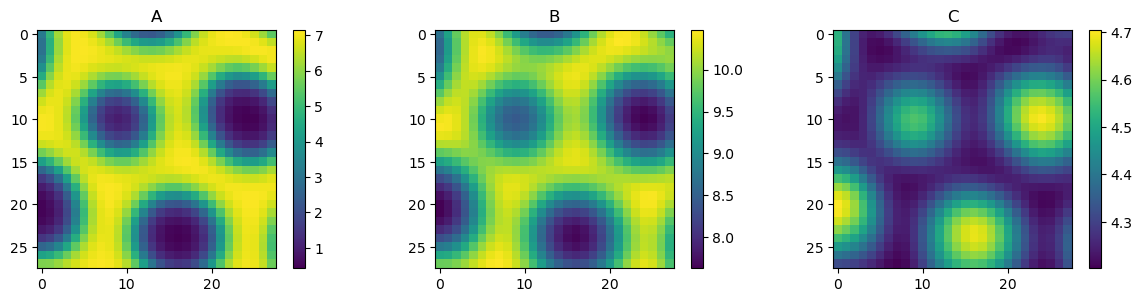

Epoch: 22000 
 data loss:0.046784, 
data A loss:0.030082, data B loss:0.008821, data C loss:0.007881, 
Laplacian A loss:0.120703, Laplacian B loss:0.058304
Physics loss:0.611857
Negative loss:0.000000

 b_A=-0.0312, b_B=-0.0045, b_C=13.9063, V_A=18.2453, V_B=106.9106, V_C=23.9290, mu_A=0.8844, mu_B=4.7834, K_AA=5.0761, K_AB=4.9675, K_AC=27.7562, K_BA=9.9539, K_BC=40.4955, K_CB=7.0783, K_CC=5.1951


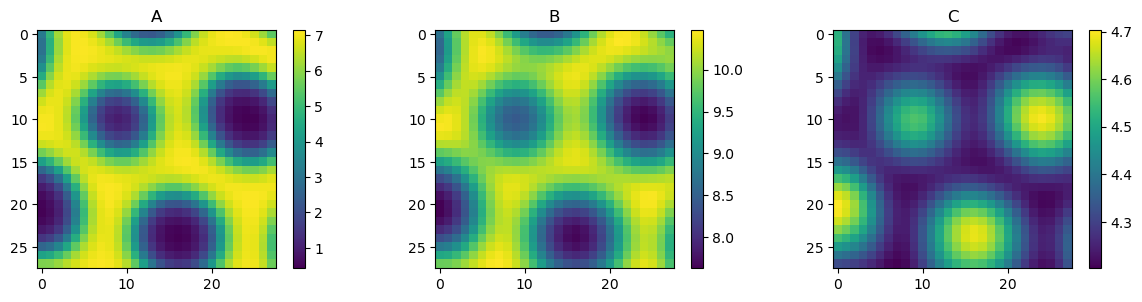

Epoch: 23000 
 data loss:0.046588, 
data A loss:0.030042, data B loss:0.008914, data C loss:0.007632, 
Laplacian A loss:0.119723, Laplacian B loss:0.059135
Physics loss:0.610158
Negative loss:0.000000

 b_A=-0.0333, b_B=-0.0063, b_C=13.9543, V_A=18.2337, V_B=107.4243, V_C=24.0799, mu_A=0.8859, mu_B=4.7846, K_AA=5.0770, K_AB=4.9664, K_AC=27.7552, K_BA=9.9553, K_BC=40.4950, K_CB=7.0002, K_CC=5.2208


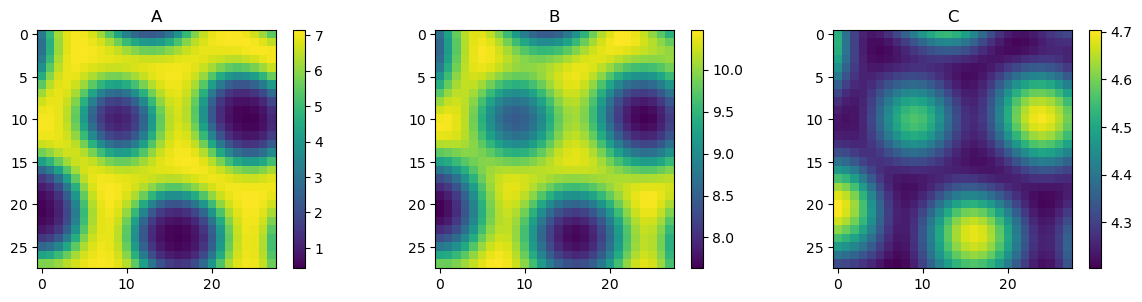

Epoch: 24000 
 data loss:0.048840, 
data A loss:0.029934, data B loss:0.009747, data C loss:0.009159, 
Laplacian A loss:0.125841, Laplacian B loss:0.078469
Physics loss:0.631822
Negative loss:0.000000

 b_A=-0.0261, b_B=0.0004, b_C=14.0068, V_A=18.2411, V_B=107.9905, V_C=24.2232, mu_A=0.8816, mu_B=4.7819, K_AA=5.0733, K_AB=4.9606, K_AC=27.7587, K_BA=9.9580, K_BC=40.4969, K_CB=6.9227, K_CC=5.2357


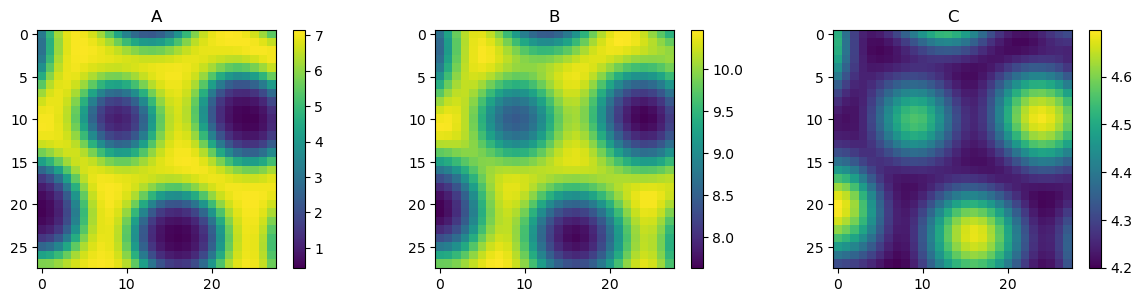

Epoch: 25000 
 data loss:0.045739, 
data A loss:0.029888, data B loss:0.008777, data C loss:0.007075, 
Laplacian A loss:0.111433, Laplacian B loss:0.057058
Physics loss:0.608083
Negative loss:0.000000

 b_A=-0.0333, b_B=-0.0066, b_C=14.0414, V_A=18.2286, V_B=108.4711, V_C=24.3551, mu_A=0.8863, mu_B=4.7853, K_AA=5.0770, K_AB=4.9621, K_AC=27.7546, K_BA=9.9567, K_BC=40.4949, K_CB=6.8541, K_CC=5.2646


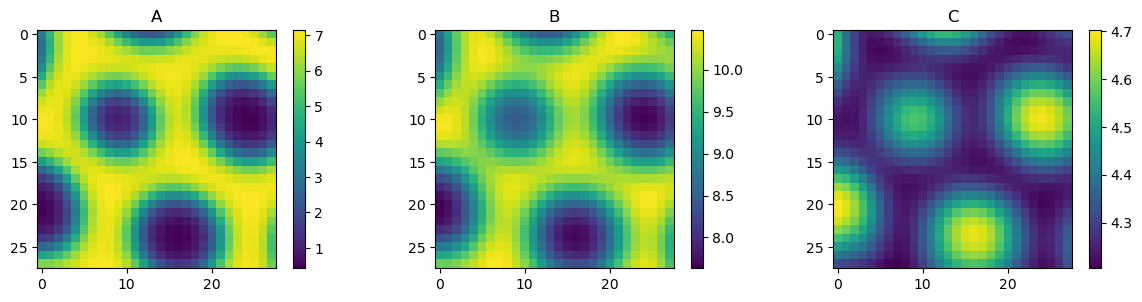

Epoch: 26000 
 data loss:0.044955, 
data A loss:0.029751, data B loss:0.008510, data C loss:0.006695, 
Laplacian A loss:0.104039, Laplacian B loss:0.053655
Physics loss:0.606193
Negative loss:0.000000

 b_A=-0.0313, b_B=-0.0044, b_C=14.0789, V_A=18.2300, V_B=108.9684, V_C=24.4784, mu_A=0.8847, mu_B=4.7843, K_AA=5.0759, K_AB=4.9584, K_AC=27.7551, K_BA=9.9575, K_BC=40.4955, K_CB=6.7902, K_CC=5.2828


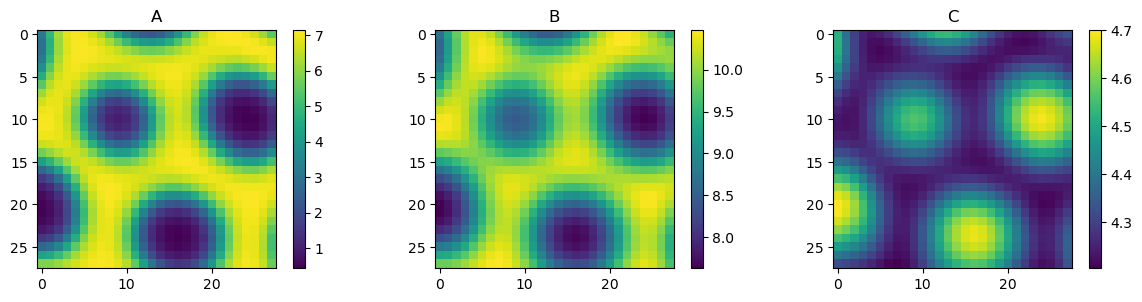

Epoch: 27000 
 data loss:0.044666, 
data A loss:0.029696, data B loss:0.008443, data C loss:0.006527, 
Laplacian A loss:0.101292, Laplacian B loss:0.052565
Physics loss:0.604799
Negative loss:0.000000

 b_A=-0.0311, b_B=-0.0043, b_C=14.1125, V_A=18.2296, V_B=109.4410, V_C=24.5948, mu_A=0.8847, mu_B=4.7846, K_AA=5.0759, K_AB=4.9560, K_AC=27.7546, K_BA=9.9575, K_BC=40.4953, K_CB=6.7308, K_CC=5.3010


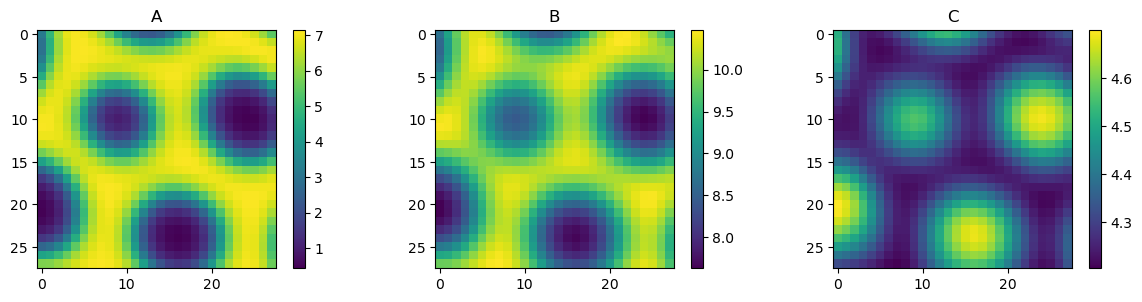

Epoch: 28000 
 data loss:0.045475, 
data A loss:0.029816, data B loss:0.008826, data C loss:0.006834, 
Laplacian A loss:0.112722, Laplacian B loss:0.057465
Physics loss:0.609794
Negative loss:0.000000

 b_A=-0.0346, b_B=-0.0065, b_C=14.1422, V_A=18.2240, V_B=109.8930, V_C=24.7085, mu_A=0.8855, mu_B=4.7861, K_AA=5.0778, K_AB=4.9550, K_AC=27.7527, K_BA=9.9552, K_BC=40.4934, K_CB=6.6749, K_CC=5.3200


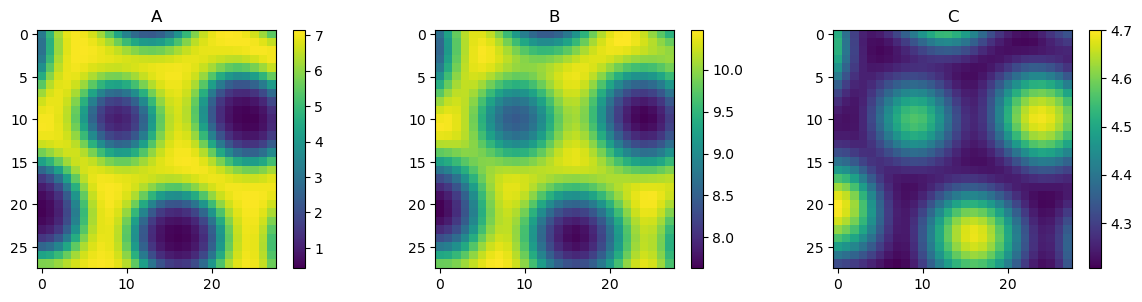

Epoch: 29000 
 data loss:0.045273, 
data A loss:0.029673, data B loss:0.008569, data C loss:0.007031, 
Laplacian A loss:0.125194, Laplacian B loss:0.056272
Physics loss:0.613433
Negative loss:0.000000

 b_A=-0.0331, b_B=-0.0069, b_C=14.1708, V_A=18.2239, V_B=110.3248, V_C=24.8136, mu_A=0.8858, mu_B=4.7862, K_AA=5.0769, K_AB=4.9536, K_AC=27.7515, K_BA=9.9573, K_BC=40.4923, K_CB=6.6272, K_CC=5.3378


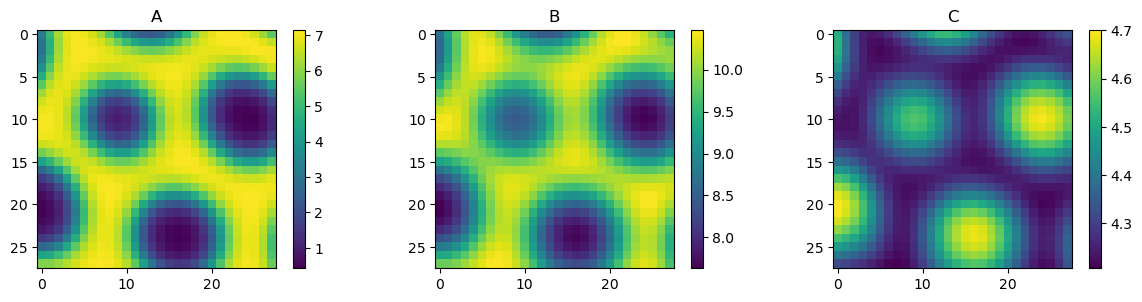

Epoch: 30000 
 data loss:0.044786, 
data A loss:0.029656, data B loss:0.008429, data C loss:0.006701, 
Laplacian A loss:0.150723, Laplacian B loss:0.057288
Physics loss:0.609073
Negative loss:0.000000

 b_A=-0.0285, b_B=-0.0024, b_C=14.2001, V_A=18.2206, V_B=110.7424, V_C=24.9210, mu_A=0.8808, mu_B=4.7834, K_AA=5.0748, K_AB=4.9520, K_AC=27.7544, K_BA=9.9538, K_BC=40.4953, K_CB=6.5914, K_CC=5.3490


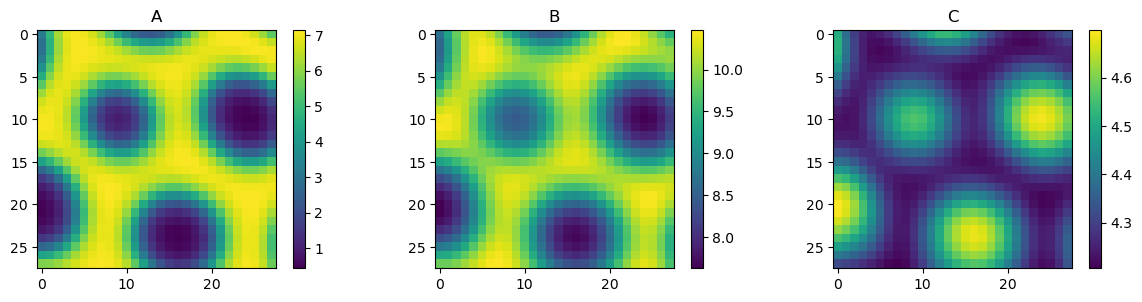

    Early dtoped at 30045
Epoch: 30045 
 data loss:0.044162, 
data A loss:0.029543, data B loss:0.008410, data C loss:0.006209, 
Laplacian A loss:0.093241, Laplacian B loss:0.051710
Physics loss:0.601637
Negative loss:0.000000

 b_A=-0.0316, b_B=-0.0043, b_C=14.2043, V_A=18.2229, V_B=110.7404, V_C=24.9240, mu_A=0.8850, mu_B=4.7852, K_AA=5.0760, K_AB=4.9503, K_AC=27.7532, K_BA=9.9590, K_BC=40.4935, K_CB=6.5822, K_CC=5.3515


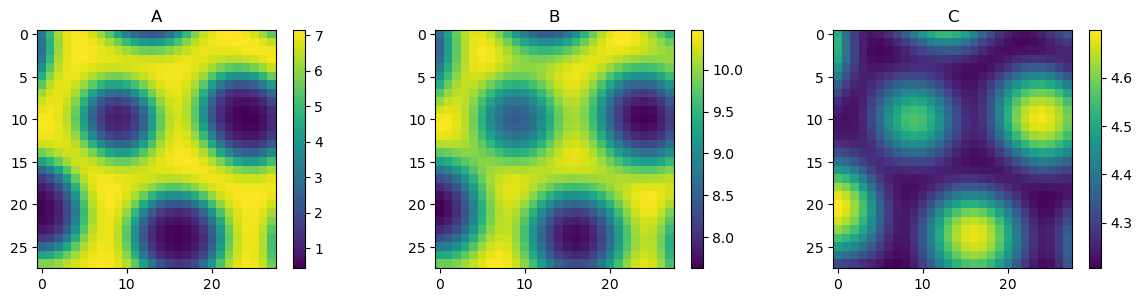

In [6]:
torch.manual_seed(42)
np.random.seed(42)
dtype = torch.float32
torch.set_default_dtype(dtype)

def create_var(init=None):
    if init is None:
        return torch.nn.Parameter(torch.ones(1, requires_grad=True, device=dev_str)), []
    else:
        return torch.nn.Parameter(init*torch.ones(1, requires_grad=True, device=dev_str)), []


D_A=params["D_A"]#, sampled_D_A = create_var()
D_B=params["D_B"]#, sampled_D_B = create_var()
b_A, sampled_b_A = create_var(1)
b_B, sampled_b_B = create_var(1)
b_C, sampled_b_C = create_var(1)
V_A, sampled_V_A = create_var(1)
V_B, sampled_V_B = create_var(1)
V_C, sampled_V_C = create_var(1)
mu_A, sampled_mu_A = create_var(1)
mu_B, sampled_mu_B = create_var(1)
mu_C=params["mu_C"]#, sampled_mu_C = create_var()
K_AA, sampled_K_AA = create_var(K_AA_init)
K_AB, sampled_K_AB = create_var(K_AB_init)
K_AC, sampled_K_AC = create_var(K_AC_init)
K_BA, sampled_K_BA = create_var(K_BA_init)
K_BC, sampled_K_BC = create_var(K_BC_init)
K_CB, sampled_K_CB = create_var(K_CB_init)
K_CC, sampled_K_CC = create_var(K_CC_init)
n = params['n']

params_name_list = [#"D_A", "D_B", 
                    "b_A", "b_B", "b_C", "V_A", "V_B", "V_C", "mu_A", "mu_B", #"mu_C",
                    "K_AA", "K_AB", "K_AC", "K_BA", "K_BC", "K_CB", 
                    "K_CC"
]

params_list = [#D_A, D_B, 
               b_A, b_B, b_C, V_A, V_B, V_C, mu_A, mu_B, #mu_C,
               K_AA, K_AB, K_AC, K_BA, K_BC, K_CB, 
               K_CC
]

params_sampled_list =[#sampled_D_A, sampled_D_B,
                      sampled_b_A, sampled_b_B, sampled_b_C, sampled_V_A, sampled_V_B, sampled_V_C,
                      sampled_mu_A, sampled_mu_B, #sampled_mu_C,
                      sampled_K_AA, sampled_K_AB, sampled_K_AC, sampled_K_BA, sampled_K_BC,
                      sampled_K_CB, sampled_K_CC
                     ]

###########################################################
# Inputs
# restrict to inner boundaries
x = torch.linspace(0, run_params.Lx, run_params.Ix)[x_slice].to(device)
y = torch.linspace(0, run_params.Ly, run_params.Jy)[y_slice].to(device)
X,Y = torch.meshgrid(x, y, indexing='ij')
data_X = torch.vstack([X.flatten(), Y.flatten()]).T.requires_grad_(True).to(device)

def transform(x, l, u):
    return (u-l)*x + l

x2 = transform(torch.rand(run_params.Ix),torch.min(x).item(),torch.max(x).item())
y2 = transform(torch.rand(run_params.Jy),torch.min(y).item(),torch.max(y).item())
X2,Y2 = torch.meshgrid(x2, y2, indexing='ij')
physics_X = torch.vstack([X2.flatten(), Y2.flatten()]).T.requires_grad_(True).to(device)
##########################################################
#   Data
# restrict to inner boundaries
data_A = torch.from_numpy(A_n[x_slice,y_slice].flatten()).to(device)
data_B = torch.from_numpy(B_n[x_slice,y_slice].flatten()).to(device)
data_C = torch.from_numpy(C_n[x_slice,y_slice].flatten()).to(device)
###########################################################
# Laplacians
# First, find the finite-diff Laplacian on the whole domain,
# then, select the inner boundaries. This way, the boundaries 
# effets removed
diffusion_scale_factor = (run_params.Ix-1)*(run_params.Jy-1)/(run_params.Lx*run_params.Ly)
laplacianA = diffusion_scale_factor * grad_diff(A_n)
laplacianB = diffusion_scale_factor * grad_diff(B_n)

laplacianA = torch.tensor(laplacianA[x_slice,y_slice].flatten()).to(device)
laplacianB = torch.tensor(laplacianB[x_slice,y_slice].flatten()).to(device)
###########################################################
zeors_tensor = torch.zeros(data_X.shape[0]).to(device)
###########################################################
# Model
lb = torch.tensor([torch.min(x).item(), torch.min(y).item()]).to(device)
ub = torch.tensor([torch.max(x).item(), torch.max(y).item()]).to(device)
model = Net_sep_dense_normalised(2,3,[128,128,128,128], lb, ub).to(device)
###########################################################
# optimizer
optimizer = torch.optim.Adam([{'params': model.parameters(), 'lr': 1e-4},
                              {'params': params_list, 'lr': .1}]
                              , lr=1e-4)#.LBFGS([*model.parameters(), *params_list], lr=1
                             #,line_search_fn='strong_wolfe')#


epochs = 30000
loss_data = 0.0
lambda_data = 1.0
loss_physics = 0.0
lambda_physics = 1e-4
loss_laplacian_physics = 0.0
lambda_physics_laplacian = 1e-2
loss_negative = 0
lambda_negative = 100

losses = np.zeros((7, epochs+6000))
last_loss = np.inf

def act(x, km, n=2):
    return x**n / (x**n + km**n)

def inh(x, km, n=2):
    return km**n / (x**n + km**n)

for i in range(epochs +6000): 
    # L-BFGS
    def closure():
        
        optimizer.zero_grad()

        #################################
        # data loss
        data_f_hat = model(data_X)
        data_A_hat = data_f_hat[0].squeeze() 
        data_B_hat = data_f_hat[1].squeeze() 
        data_C_hat = data_f_hat[2].squeeze() 
        loss_A_data = torch.mean((data_A - data_A_hat)**2)
        loss_B_data = torch.mean((data_B - data_B_hat)**2)
        loss_C_data = torch.mean((data_C - data_C_hat)**2)
        loss_data = (loss_A_data + loss_B_data + loss_C_data)/3
        #################################
        loss_negative = torch.mean(torch.maximum(-data_A_hat, zeors_tensor)**2
                       )+ torch.mean(torch.maximum(-data_B_hat, zeors_tensor)**2
                       )+ torch.mean(torch.maximum(-data_C_hat, zeors_tensor)**2
                       )
        #################################
        # Laplacians derivatives        
        laplacianA_hat = Laplacian(data_A_hat, data_X)
        laplacianB_hat = Laplacian(data_B_hat, data_X)
        
        A_loss_laplacian = torch.mean((laplacianA_hat-laplacianA)**2)
        B_loss_laplacian = torch.mean((laplacianB_hat-laplacianB)**2)
        loss_laplacian_physics = A_loss_laplacian + B_loss_laplacian
        ###############################
        # physics derivatives  
        physics_f_hat = model(physics_X)
        A = physics_f_hat[0].squeeze() 
        B = physics_f_hat[1].squeeze() 
        C = physics_f_hat[2].squeeze() 
        
        laplacianA_hat = Laplacian(A, physics_X)
        laplacianB_hat = Laplacian(B, physics_X)
        
        F_A =  b_A + V_A*act(A, K_AA, n)*inh(B, K_BA, n) - mu_A * A    
        F_B =  b_B + V_B*act(A, K_AB, n)*inh(C, K_CB, n) - mu_B * B        
        F_C =  b_C + V_C*inh(A, K_AC, n)*inh(B, K_BC, n)*act(C, K_CC, n) - mu_C * C        

        dAdt = D_A * laplacianA_hat + F_A
        dBdt = D_B * laplacianB_hat + F_B
        dCdt = F_C
        ################################
        # physics loss
        # Construct the physics loss here
        A_loss_physics = torch.mean(dAdt**2)
        B_loss_physics = torch.mean(dBdt**2)
        C_loss_physics = torch.mean(dCdt**2)
        loss_physics = (A_loss_physics  
                        + B_loss_physics 
                        + C_loss_physics)
        ###############################
        total_loss = (
            +lambda_data*loss_data            
            +lambda_physics_laplacian*loss_laplacian_physics
            +lambda_physics*loss_physics
            #+lambda_negative*loss_negative
                        )

        total_loss.backward(retain_graph=True)
        
        
        losses[:,i] = (loss_A_data.item(), loss_B_data.item(), loss_C_data.item(), 
                       A_loss_laplacian.item(), B_loss_laplacian.item(),
                       loss_physics.item(), loss_negative.item())                    
            
        return total_loss
    
    
    
    optimizer.step(closure)
    
    def show_outputs(i):
        ls = np.sqrt(losses[:, i])
        print("============================================")
        print(f"Epoch: {i+1} \n data loss:{np.sum(ls[0:3]):.6f}, \n"
              f"data A loss:{ls[0]:.6f}, data B loss:{ls[1]:.6f}, data C loss:{ls[2]:.6f}, \n"
              f"Laplacian A loss:{ls[3]:.6f}, Laplacian B loss:{ls[4]:.6f}\n"
              f"Physics loss:{ls[5]:.6f}\n"
              f"Negative loss:{ls[6]:.6f}\n"
              f"\n"
              ,
              ", ".join([f"{name}={param.item():.4f}" for param, name in zip(params_list, params_name_list)])
             )
        data_f_hat = model(data_X)        
        data_A_hat = data_f_hat[0].squeeze() 
        data_B_hat = data_f_hat[1].squeeze() 
        data_C_hat = data_f_hat[2].squeeze() 
        plot_n_im([to(data_A_hat.cpu().detach().numpy()), 
                   to(data_B_hat.cpu().detach().numpy()), 
                   to(data_C_hat.cpu().detach().numpy())], 
           ["A","B","C"],          
        figsize=(12, 3)); plt.tight_layout();plt.show()
       
    
    if i < epochs and last_loss > np.sum(losses[:,i]):
        last_loss =  np.sum(losses[:,i])
            
    elif np.sum(losses[:,i]) < last_loss:
        print("============================================")
        print(f"    Early dtoped at {i+1}")
        print("============================================")
        show_outputs(i)
        early_stop = True
        with torch.no_grad():
            for i,(param, name) in enumerate(zip(params_list, params_name_list)):
                l,u = get_bound(name)
                param[:] = param.clamp(l,u)
                params_sampled_list[i].append(param.item())
        break        
    
    if (i+1)%1000 == 0 or i==0:        
        show_outputs(i)
        
    with torch.no_grad():
        for i,(param, name) in enumerate(zip(params_list, params_name_list)):
            l,u = get_bound(name)
            param[:] = param.clamp(l,u)
            params_sampled_list[i].append(param.item())
            


# Plot the trained outputs

A RMSE:0.02956279108960635 B RMSE:0.008286391614987725 C RMSE:0.006171660420611325
F_A actual:0.9072123787570736, F_A:0.9044726490974426, RMSE: 0.018223888160871327
F_B actual:715.9707289852231, F_B:707.750244140625, RMSE: 0.31758276865314655
F_C actual:4.464229024647136e-06, F_C:0.000431371561717242, RMSE: 0.02009700161918373

Laplacian A RMSE: 0.09285578016100922
Laplacian B RMSE: 0.05035593270343438

dAdt RMSE: 0.01819928864773964
dBdt RMSE: 0.3280561621260018
dCdt RMSE: 0.02009700161918373


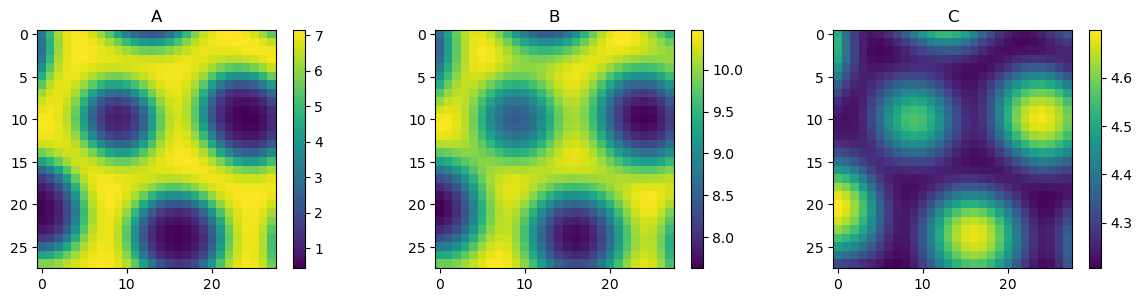

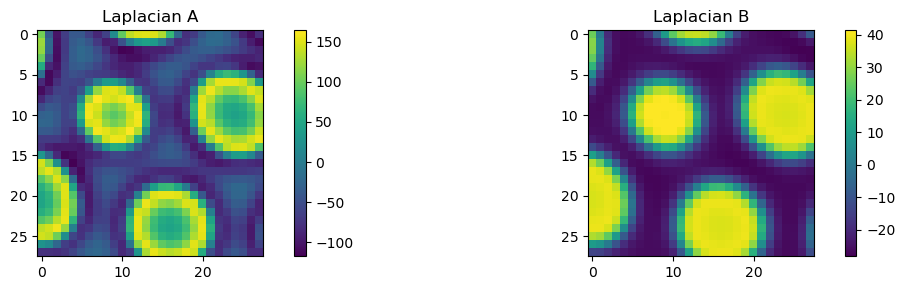

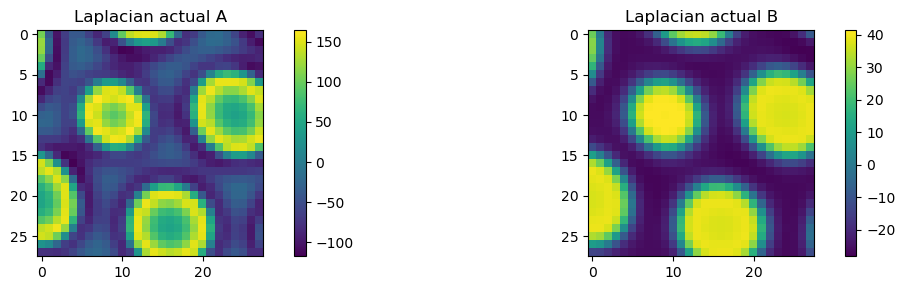

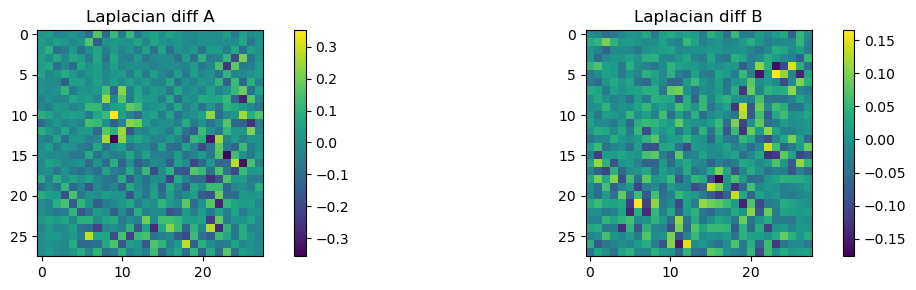

In [7]:
physics_f = model(data_X)
A_hat = physics_f[0].squeeze()
B_hat = physics_f[1].squeeze()
C_hat = physics_f[2].squeeze()

laplacianA_hat = Laplacian(A_hat, data_X)
laplacianB_hat = Laplacian(B_hat, data_X)

A_hat = to(A_hat.cpu().detach().numpy())
B_hat = to(B_hat.cpu().detach().numpy())
C_hat = to(C_hat.cpu().detach().numpy())
laplacianA_hat = to(laplacianA_hat.cpu().detach().numpy())
laplacianB_hat = to(laplacianB_hat.cpu().detach().numpy())


laplacianA = diffusion_scale_factor * grad_diff(A_n)[x_slice,y_slice]
laplacianB = diffusion_scale_factor * grad_diff(B_n)[x_slice,y_slice]

n = params["n"]

A = A_n[x_slice,y_slice]
B = B_n[x_slice,y_slice]
C = C_n[x_slice,y_slice]

F_A =  params["b_A"] + params["V_A"]*act(A, params["K_AA"], n)*inh(B, params["K_BA"], n) - params["mu_A"] * A
F_A_hat =  params["b_A"] + params["V_A"]*act(A_hat, params["K_AA"], n)*inh(B_hat, params["K_BA"], n) - params["mu_A"] * A_hat
F_B =  params["b_B"] + params["V_B"]*act(A, params["K_AB"], n)*inh(C, params["K_CB"], n) - params["mu_B"] * B
F_B_hat =  params["b_B"] + params["V_B"]*act(A_hat, params["K_AB"], n)*inh(C_hat, params["K_CB"], n) - params["mu_B"] * B_hat
F_C =  params["b_C"] + params["V_C"]*inh(A, params["K_AC"], n)*inh(B, params["K_BC"], n)*act(C, params["K_CC"], n) - params["mu_C"] * C
F_C_hat =  params["b_C"] + params["V_C"]*inh(A_hat, params["K_AC"], n)*inh(B_hat, params["K_BC"], n)*act(C_hat, params["K_CC"], n) - params["mu_C"] * C_hat


dAdt = params["D_A"]*laplacianA + F_A
dAdt_hat = params["D_A"]*laplacianA_hat + F_A_hat
dBdt = params["D_B"]*laplacianB + F_B
dBdt_hat = params["D_B"]*laplacianB_hat + F_B_hat

print(f"A RMSE:{np.sqrt(np.mean((A_hat-A)**2))}",
      f"B RMSE:{np.sqrt(np.mean((B_hat-B)**2))}",
      f"C RMSE:{np.sqrt(np.mean((C_hat-C)**2))}")

print(f"F_A actual:{np.mean(F_A**2)}, F_A:{np.mean(F_A_hat**2)}, RMSE: {np.sqrt(np.mean((F_A - F_A_hat)**2))}")
print(f"F_B actual:{np.mean(F_B**2)}, F_B:{np.mean(F_B_hat**2)}, RMSE: {np.sqrt(np.mean((F_B - F_B_hat)**2))}")
print(f"F_C actual:{np.mean(F_C**2)}, F_C:{np.mean(F_C_hat**2)}, RMSE: {np.sqrt(np.mean((F_C - F_C_hat)**2))}")
      

print()
print(f"Laplacian A RMSE: {np.sqrt(np.mean((laplacianA_hat-laplacianA)**2))}")
print(f"Laplacian B RMSE: {np.sqrt(np.mean((laplacianB_hat-laplacianB)**2))}")

print()
print(f"dAdt RMSE: {np.sqrt(np.mean((dAdt-dAdt_hat)**2))}")
print(f"dBdt RMSE: {np.sqrt(np.mean((dBdt-dBdt_hat)**2))}")
print(f"dCdt RMSE: {np.sqrt(np.mean((F_C-F_C_hat)**2))}")

plot_n_im([A_hat, B_hat, C_hat], 
          ["A", "B", "C"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()


plot_n_im([laplacianA_hat, laplacianB_hat], 
          ["Laplacian A", "Laplacian B"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()

plot_n_im([laplacianA, laplacianB], 
          ["Laplacian actual A", "Laplacian actual B"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()

plot_n_im([laplacianA_hat-laplacianA, laplacianB_hat-laplacianB], 
          ["Laplacian diff A", "Laplacian diff B"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()



# Plot losses

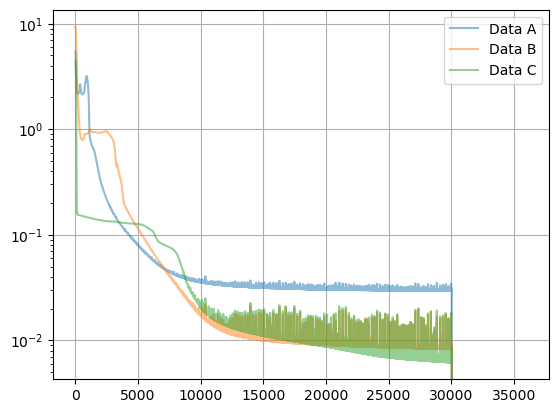

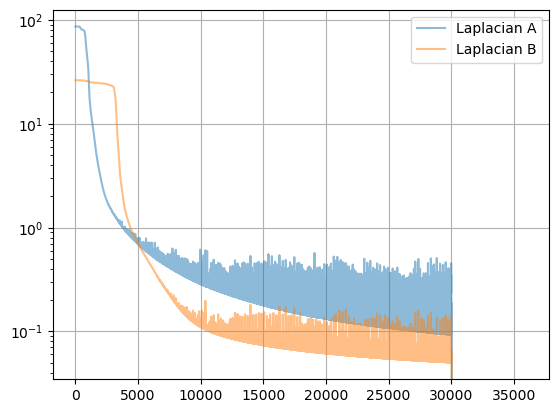

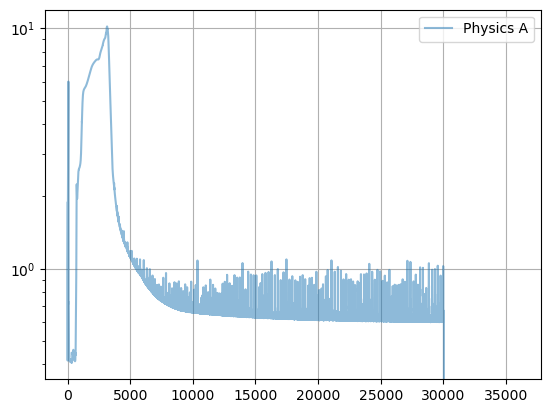

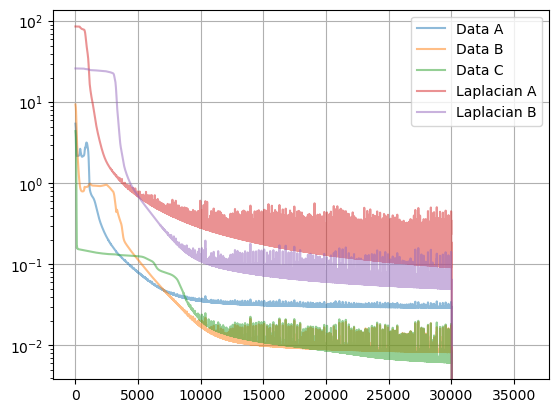

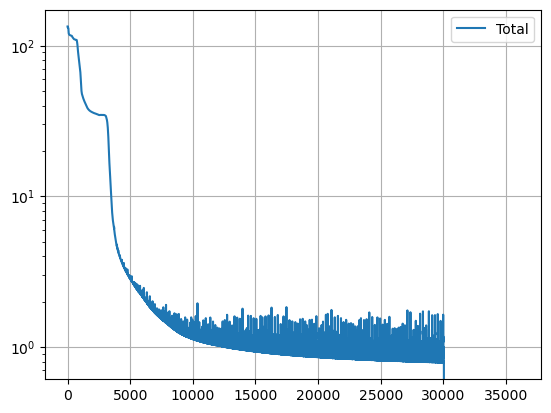

In [8]:
ls= np.sqrt(losses)
plt.plot(ls[0,:], alpha=.5, label="Data A")
plt.plot(ls[1,:], alpha=.5, label="Data B")
plt.plot(ls[2,:], alpha=.5, label="Data C")
plt.yscale('log');plt.grid();plt.legend();plt.show()

plt.plot(ls[3,:], alpha=.5, label="Laplacian A")
plt.plot(ls[4,:], alpha=.5, label="Laplacian B")
plt.yscale('log');plt.grid();plt.legend();plt.show()

plt.plot(ls[5,:], alpha=.5, label="Physics A")
plt.yscale('log');plt.grid();plt.legend();plt.show()


plt.plot(ls[0,:], alpha=.5, label="Data A")
plt.plot(ls[1,:], alpha=.5, label="Data B")
plt.plot(ls[2,:], alpha=.5, label="Data C")
plt.plot(ls[3,:], alpha=.5, label="Laplacian A")
plt.plot(ls[4,:], alpha=.5, label="Laplacian B")
plt.yscale('log'); plt.grid();plt.legend();plt.show()

plt.plot(np.sum(ls, axis=0), label="Total")
plt.yscale('log'); plt.grid();plt.legend();plt.show()


# Plot the trained Field and its difference

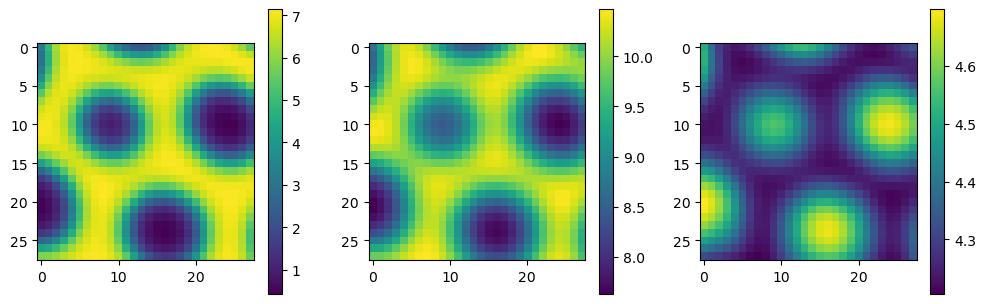

In [9]:
solution_hat = model(data_X)
A_hat = to(solution_hat[0].cpu().detach().numpy())
B_hat = to(solution_hat[1].cpu().detach().numpy())
C_hat = to(solution_hat[2].cpu().detach().numpy())
_ = plt.figure(figsize=(10,6))
plt.subplot(131)
plt.imshow(A_hat)
plt.colorbar(shrink=.5)
plt.subplot(132)
plt.imshow(B_hat)
plt.colorbar(shrink=.5)
plt.subplot(133)
plt.imshow(C_hat)
plt.colorbar(shrink=.5)
plt.tight_layout()
plt.show()

0.02956279108960635
0.008286391614987725
0.006171660420611325


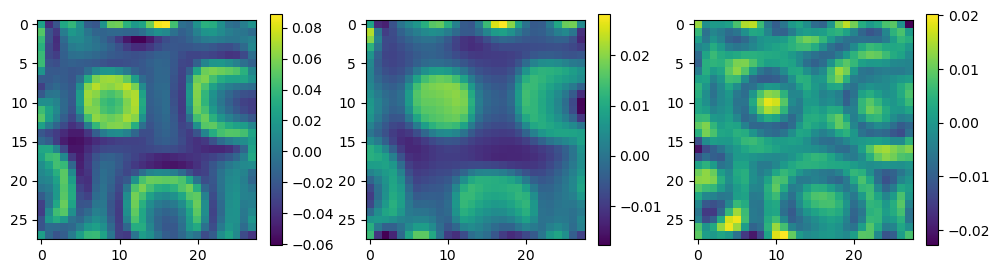

In [10]:
_ = plt.figure(figsize=(12,4))
plt.subplot(131)
plt.imshow(A_hat-A)
print(np.sqrt(np.mean((A_hat-A)**2)))
plt.colorbar(shrink=.75)
plt.subplot(132)
plt.imshow(B_hat-B)
print(np.sqrt(np.mean((B_hat-B)**2)))
plt.colorbar(shrink=.75)
plt.subplot(133)
plt.imshow(C_hat-C)
print(np.sqrt(np.mean((C_hat-C)**2)))
plt.colorbar(shrink=.75)
plt.show()


# Second optimisation
## Find the parameters

In [11]:
estimated_params = dict()
for l, name in zip(params_list, params_name_list):    
    estimated_params[name] = l.item()

In [12]:
Ks_bounds = {"K_AA":K_AA_bound, 
             "K_AB":K_AB_bound, 
             "K_AC":K_AC_bound,
             "K_BA":K_BA_bound, 
             "K_BC":K_BC_bound,
             "K_CB":K_CB_bound, 
             "K_CC": K_CC_bound}
def closest_bound(name, v):
    if not name.startswith("K"):
        return np.nan
    lower, upper = Ks_bounds[name]
    if np.abs(v-lower) < np.abs(v-upper):
        return lower
    else:
        return upper 
def get_bound(name):
    if not name.startswith("K"):
        return (np.nan,np.nan)
    return Ks_bounds[name]
print("name \tOriginl \tEst. \tClosest Bound \tBounds")
print("-------------------------------------------------------------------------------------------------------------")
print("\n".join([ f"{name}:\t{params[name]:.3f}\t\t"                                  
                  f"{estimated_params[name]:.3f}\t\t"
                  f"{closest_bound(name, estimated_params[name]):.3f}\t\t"
                  f"({get_bound(name)[0]:.3f},{get_bound(name)[1]:.3f})"
      for name in params_name_list
]))

name 	Originl 	Est. 	Closest Bound 	Bounds
-------------------------------------------------------------------------------------------------------------
b_A:	0.001		0.000		nan		(nan,nan)
b_B:	1.000		0.000		nan		(nan,nan)
b_C:	20.000		14.204		nan		(nan,nan)
V_A:	20.000		18.223		nan		(nan,nan)
V_B:	100.000		110.740		nan		(nan,nan)
V_C:	100.000		24.924		nan		(nan,nan)
mu_A:	1.000		0.885		nan		(nan,nan)
mu_B:	5.000		4.785		nan		(nan,nan)
K_AA:	5.000		5.076		0.054		(0.054,27.753)
K_AB:	5.000		4.950		0.054		(0.054,27.753)
K_AC:	10.000		27.753		27.753		(0.054,27.753)
K_BA:	10.000		9.959		1.815		(1.815,40.495)
K_BC:	10.000		40.494		40.495		(1.815,40.495)
K_CB:	10.000		6.582		1.122		(1.122,18.361)
K_CC:	10.000		5.351		1.122		(1.122,18.361)


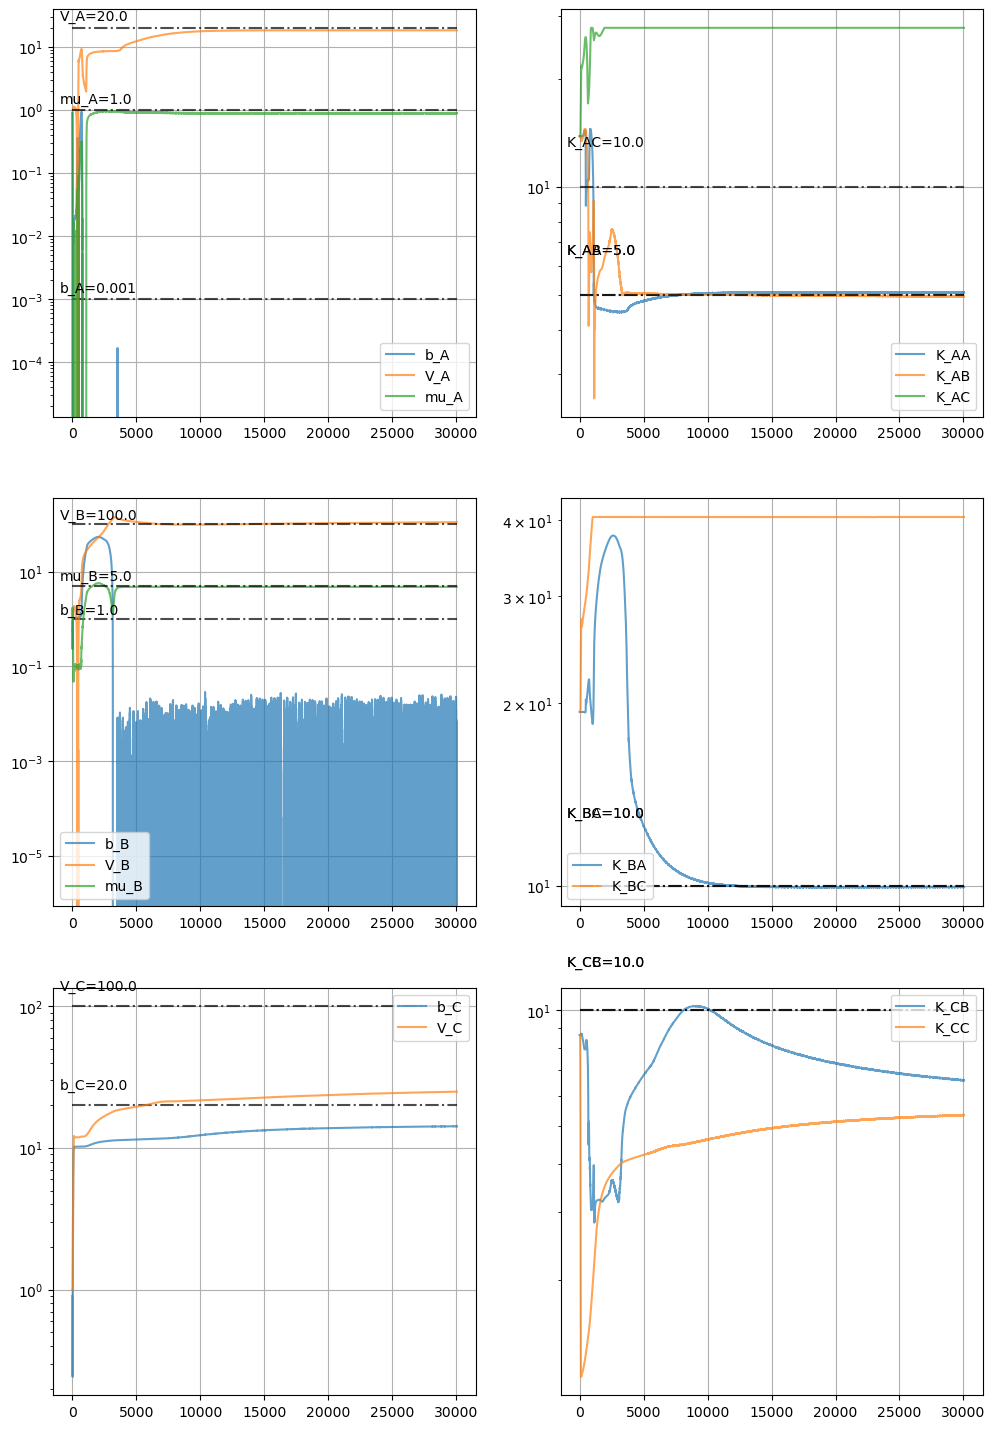

In [18]:
def plot_params(ax, names):    
    for i,(param, name) in enumerate(zip(params_list, params_name_list)):    
        if name not in names:
            continue
        ax.plot(params_sampled_list[i], label=f"{name}", alpha=.7)
        ax.hlines(params[name], 0, len(params_sampled_list[i]), 
                   linestyles='-.', alpha=.7, color='black')
        ax.text(-1000, 1.3*params[name], f"{name}={params[name]}")
    plt.yscale('log');plt.legend();plt.grid()   
    
_ = plt.figure(figsize=(12,18))
plot_params(plt.subplot(321), ["b_A", "mu_A", "V_A"])
plot_params(plt.subplot(322), ["K_AA","K_AB","K_AC"])
plot_params(plt.subplot(323), ["b_B", "mu_B", "V_B"])
plot_params(plt.subplot(324), ["K_BA","K_BC"])
plot_params(plt.subplot(325), ["b_C", "mu_C", "V_C"])
plot_params(plt.subplot(326), ["K_CB","K_CC"])

In [17]:
import pickle

torch.save(model, "./06_outputs/model_PINN_14")
torch.save(model.state_dict(), "./06_outputs/model_PINN_state_14")
with open('./06_outputs/model_PINN_params_name_list_14.npy', 'wb') as f:
    np.save(f, params_name_list)    
with open('./06_outputs/model_PINN_losses_14.npy', 'wb') as f:
    np.save(f, losses)    
with open(f"./06_outputs/model_PINN_estimated_params_14.pkl", "wb") as f:
    pickle.dump((dict(params),  dict(estimated_params)), f)
with open(f"./06_outputs/model_PINN_estimated_params_list_14.pkl", "wb") as f:
    pickle.dump(params_sampled_list, f)     

In [14]:
import sys
import pathlib
import pickle
from pathlib import Path
sys.path.append(f"{Path.home()}/morpho_repo")
sys.path.append(f"{Path.home()}/morpho_repo/pytorch")

sys.path.append(f"{Path.home()}/morpho_repo")
sys.path.append(f"{Path.home()}/morpho_repo/turing_codebase")

from turing.three_nodes_circuits import create_circuit_3954
from pde_solvers.cn import RD_2D_1st_Order, Neumann_Boundary_2D

D_A, D_B , n, mu_C= 0.01, 1.0, 4, params["mu_C"]
model_integrator = RD_2D_1st_Order(Ds=[D_A, D_B, 0], 
                        delta_t=100/5000, 
                        Lx=10, Ly=10, 
                        Ix=128, Jy=128,
                        boundary_condition=Neumann_Boundary_2D)

/end/home/rh2310/.conda/envs/pytorch/lib/python3.11/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:412: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)


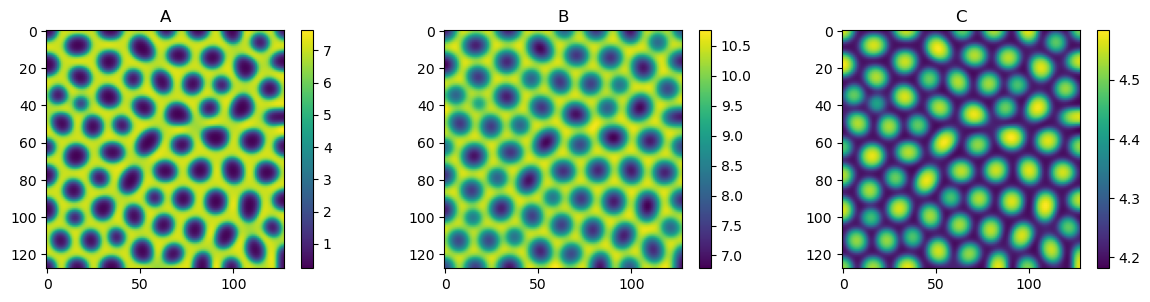

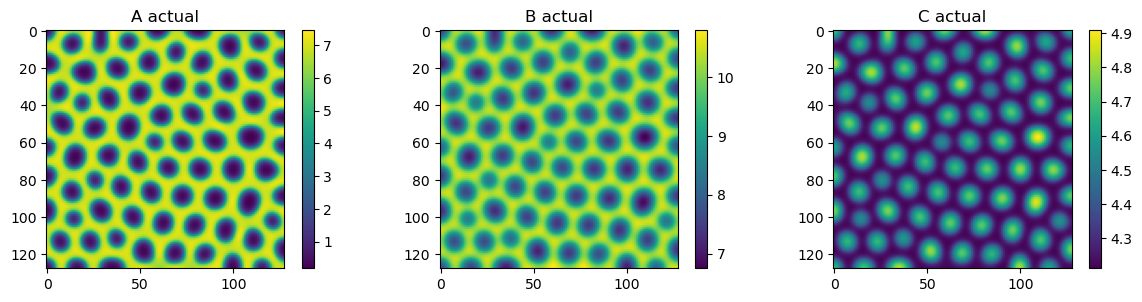

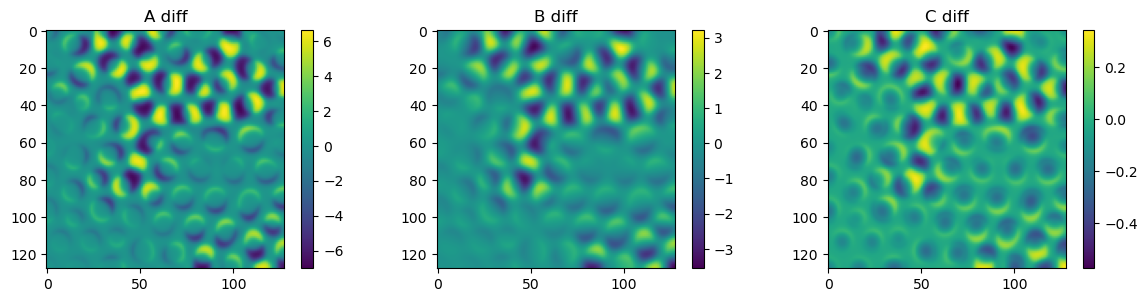

In [15]:

params2 = {}
for k,v in estimated_params.items():
    if not k.startswith("K"):
        params2[k] = v
    else:
        lower, upper = Ks_bounds[k]
        if v < lower:
            params2[k] = lower
        elif v > upper:
            params2[k] = upper
        else:
            params2[k] = v

kinetics = create_circuit_3954(n,params2["b_A"], params2["mu_A"], params2["V_A"], 
                                       params2["K_AA"], params2["K_AB"], params2["K_AC"],
                                       params2["b_B"], params2["mu_B"], params2["V_B"], 
                                       params2["K_BA"], params2["K_BC"],
                                       params2["b_C"], mu_C, params2["V_C"], 
                                       params2["K_CB"], params2["K_CC"])

(A_init, B_init, C_init) = (solution[0, 0, :, :].flatten(),
                            solution[0, 1, :, :].flatten(),
                            solution[0, 2, :, :].flatten())
solution_test = model_integrator.integrate([A_init, B_init, C_init],kinetics, 4*5000, record_steps=5000)

A_test = solution_test[-1,0, :].reshape((128,128))
B_test = solution_test[-1,1, :].reshape((128,128))
C_test = solution_test[-1,2, :].reshape((128,128))
plot_n_im([A_test,B_test,C_test], 
           ["A","B","C"],          
        figsize=(12, 3)); plt.tight_layout();plt.show() 

plot_n_im([solution[105, 0, :, :],solution[105, 1, :, :],solution[105, 2, :, :]], 
           ["A actual","B actual","C actual"],          
        figsize=(12, 3)); plt.tight_layout();plt.show() 

plot_n_im([A_test-solution[105, 0, :, :],
           B_test-solution[105, 1, :, :],
           C_test-solution[105, 2, :, :]], 
           ["A diff","B diff","C diff"],          
        figsize=(12, 3)); plt.tight_layout();plt.show() 

In [16]:
{1:31,
2:3,
3:9, 
4:25,
5:14,
6:60,
7:24,
8:26,
9:65}

{1: 31, 2: 3, 3: 9, 4: 25, 5: 14, 6: 60, 7: 24, 8: 26, 9: 65}